# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

%matplotlib inline

# What is Linear Regression ?

        Linear regression assumes a linear or straight line relationship between the input variables (X) and
        single output variable (y).

        The output 'Y' or the prediction h(x) can be estimated from a linear combination of the input variables (X). 
        When there is a single input variable X = [X1] , then this method is called simple linear regression.
        
        in such case h(x)= theta0 + theta1*X1
        where theta0, theta1 are co efficients ; comapring with Y = c + mx
        theta0 can be considered as 'c' the intercept term and theta1 as 'm' the slope
        
        We then require a cost function such that
        it calculates the mean squared error between the actual value of Y and our estimated value h(x)
        
        Then we need to minimize this error by changing the values of theta0 and theta1 
        this is done by a method called Gradient descent
        after the error is minimized we use those values of theta0 and theta1 for which the error is minimum
        or when our estimated value is almost same as the actual value
        
        These values of Theta0 and Theta1 are the used to predict Y for values of X (X = [X1] single attribute) in testset
        predicted Y = theta0(minimized) + theta1 * Xi ; 
        where xi is the ith example in the test set and Yi is the actual value of Y for Xi

# Requirements:

            let prediction(theta,Xi) be a function that estimates Yi for given Xi and Optimum theta.
            Prediction(theta,Xi): theta is 1d vector [theta0 , theta1]; theta is the optimized value of theta such 
            that the difference between predicted value and actual value (cost/mean squared error) is minimum.
            
                Xi is an example or an instance of X (an entire row with only 1 attribute X1)
                The predicted value for Xi is given by:
                Prediction(theta,Xi) = theta0 + Theta1* Xi
                                     = theta0*X0 + Theta1 * X1 (X0 is always =1)
                        
                        
            for easy of calculation using vector multiplication we add a vector X0 to our X
            X0 is a M dimensional vector of all 1's where M is the number of rows or no of examples in X
            so X = [X0, X1] 
            where, X0 is a column of all 1 X1 is the coloumn containing the value of attribute X1 for each row/example in X
            
            then prediction(theta,Xi) = Theta * Xi' ; theta * Xi(Transpose) 
            now we need to get the optimum value of theta
            for this we require i)  cost function: to calculate the Mean sq error
                                ii) gradient descent to minimize the cost function with respect to theta
                                
            Before diving in the cost function
            we require a method to transpose a 1d vector and also to add a column X0 to X
            such that all X0 = 1
            example if X = [[2],[1],[6]]
            then after adding X0 terms : X = [[1,2],[1,1],[1,6]]
            
            
            

# Function to Transpose an array:

In [2]:
def Transpose(x): # x is np array of dimension 1 X n ; 1 row , n columns (n being the number of attributes)
    x = np.array(x)
    x = x.transpose()
    return x  # returns a vector of size n X 1 ;n rows , 1 column 

# How Transpose works:

        Note : In python each sublist is a row and no of element in each sublist = num of cols

In [3]:
y = [[1,2,3]]
#then we should get yT = [[1],[2],[3]]
x = [[1,2],[3,6]] 
# then xT = [[1,3],[2,6]]
yT = Transpose(y)
print(yT)
print("")
xT = Transpose(x)
print(xT)

[[1]
 [2]
 [3]]

[[1 3]
 [2 6]]


# Function to add X0 column in X :

In [4]:
def addX0(X):      ## X = [X1,X2] we need x1 and x2 to be seperate rows X = [[x1],[x2]]
    X = np.array(X,dtype=float)
    l = len(X)
    X0 = np.ones((l,1),dtype=float)  # creating a column of 1
    X = np.column_stack((X0,X)) 
    return X

# How inserting X0 works: 

        consider the following example given in cell below:

In [5]:
x = [2,3] #its still a list 
x = np.array(x)
l = len(x)
X0 = np.ones((l,1),dtype=float)
X = np.column_stack((X0,x))
X

array([[1., 2.],
       [1., 3.]])

# Step 1 : The Cost Function Cost(theta):

        Cost(X,Y,theta) : simply calcultes the sum of all mean squared errors between h(Xi) and Yi
        so : Cost(theta): = (1/2M) * sum((h(xi)-yi)^2) where i = 1 to M

In [6]:
def costFunc(X,Y,theta):
    m = len(Y)
    
    Y = np.array([Y])
    Y = Transpose(Y)                              # Y = Y' coloumn vector
    
    theta= np.array([theta])
    theta= Transpose(theta)                       # theta = theta' coloumn vector
   
    X = addX0(X)                         # adding X0 column to X
    
    estimated_val = X @ theta               #  @ : matrix multiplication , * : scalar multiplication
        
    error = np.subtract(estimated_val,Y)    # matrix subtraction
    sq_error = error **2                # element wise square
    
    cost = 1/(2*m) * sum(sq_error)
    return cost[0]

# Verify if Cost function works:

In [7]:
X = [[1,2,1],[1,8,2]]
Y=[12,28]
theta = [1,3,2,5]
# m(no of rows = 2)
# x becomes = X[[1,1,2,1],[1,2,8,2]] Y= [[2],[8]] theta = [[1],[3],[2],[5]]
#hpy = [[(1*1 + 1*3 + 2*2 +1*5)],[(1*1+1*3+8*2+2*5)] ] = [[13],[26]]
#error = [[13-12],[26-28]]=[[1],[-2]]
#sq_error = [[1],[4]]
#cost = (1/4) * sum(1+4)=5/4=1.25
cost = costFunc(X,Y,theta)
cost

1.25

# Step 1 : Minimize the cost function with respect to theta :

#             what is gradient descent ?

        Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) 
        of  cost function (f) that minimizes a cost function
    
        psuedocode:
            
        repeat untill no change in Theta
        {
            theta(j) = theta(j) - alpha *  d/d(thetaj) (cost(theta))
        } for 0<=j<=n 
        (as we add the X0 intercept term so if there is only 1 feature n=1 we will have theta0 & theta 1 hence 0<=j<=n )
        
        what is alpha ?
        The learning rate.
        it controls by how much the coefficients (theta) changes with each update
        alpha large : the value of theta decreases rapidly with each update
        alpha small the value of theta decreases slowly with each update
        
        vectorized implementation:
            
        d/d(theta(j) cost(theta) = d/d(theta(j) {(1/2M) * sum((h(xi)-yi)^2) } where i = 1 to M
        after differentiating we get :
                                       
        d/d(theta(j) cost(theta) = (1/M) * sum{(h(xi)-yi)X(i,j)} where i = 1 to M (row number )and j = column number  
            
        so:
        theta(0)= theta(0) - alpha* {(1/M) * sum{ (h(xi)-yi) * X(i,0) }} for i = 1 to M (row number )
        theta(1)= theta(1) - alpha* {(1/M) * sum{ (h(xi)-yi) * X(i,1) }} for i = 1 to M (row number )
        .
        .
            
        now let delta = (1/M) * sum{ (h(xi)-yi) * X(i,j) } ,  h(xi)-yi): error for each estimated vs actual value
                delta = (1/M) * sum{ error * X(i,j) } ;   0 <= j <= n ; n = number of features , (from 0 as X0 is added)
                X(i,j) : depends on theta(for theta 1 : X(i,1)) while i denotes all rows 
                its basically a 1-dimensional vector
                
         so Theta = Theta - alpha*delta
         
         lastly, the values of theta vector for which the cost is minimum is our optimized theta

# Implementing Gradient descent:

            vectorized implementation

In [8]:
def GradientDescent(x,y,theta,alpha,num_iterations):
    
    no_of_examples = len(y)
    cost_history = np.zeros(num_iterations,dtype=float)
    #cost_history is an array with elements=num_iteration, to store change in cost(mean sq error)to chekc for convergence
    
    Y = np.array([y])
    Y = Transpose(Y)                              # Y = y' coloumn vector
    Theta= np.array(theta)
    Theta= Transpose(Theta)                       # Theta = theta' coloumn vector
    X = addX0(x)                                  # adding X0 column to x 
    
    for i in range(num_iterations):
        cost_history[i] = costFunc(x,y,Theta)
        
        estimated_val = X @ Theta               #  @ : matrix multiplication , * : scalar multiplication
        error = np.subtract(estimated_val,Y)    # matrix subtraction
        delta = Transpose(X) @ error       
        delta = delta/no_of_examples
        
        Theta = Theta - (alpha * delta)
        
    return Theta,cost_history

# Load Dataset:
    
    Dataset contains two Columns X & Y 
    number of examples = 97
    X is treated as the feature
    Y is treated as the variable dependent on X 

In [9]:
data = pd.read_csv('data.txt',header=None)
data.columns=['X','Y']
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [11]:
X = data['X']
Y = data['Y']

In [12]:
X = np.array(X)

In [13]:
Y = np.array(Y)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

67
67
30
30


In [15]:
alpha = 0.005
n = np.size(X[1])+1                          # no of features in X + 1 for X0 term which will be added
initial_Theta = np.zeros((1,n),dtype=float)  # initialize theta vector with all 0's
iterations = 20
theta,cost_history=GradientDescent(x=X_train,y=Y_train,theta=initial_Theta,alpha=alpha,num_iterations=iterations)
print("Theta value we got after 20 iteration\n")
print(theta)
print("-------------------------------------")
print("change in cost with iteration\n")
print(cost_history)

Theta value we got after 20 iteration

[[0.00125051]
 [0.8111048 ]]
-------------------------------------
change in cost with iteration

[0.61190176 0.15211041 0.02624355 0.00086587 0.00227297 0.00856305
 0.01408007 0.01792688 0.02038992 0.0219088  0.02283147 0.02339146
 0.02373513 0.02395116 0.02409234 0.02418977 0.02426168 0.02431873
 0.02436712 0.02441047]


# Find the optimal num of iterations required for Convergence:

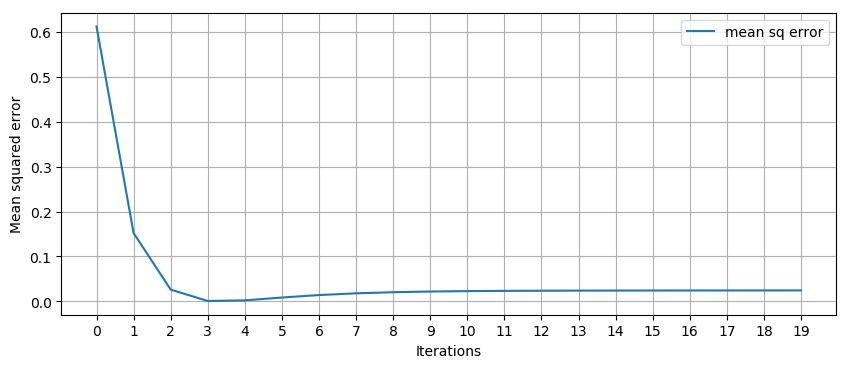

In [16]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(np.arange(0,iterations,step=1),cost_history,label="mean sq error")
plt.xticks(np.arange(0,iterations,step=1))
plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid()

# Trying to vizualize the convergence point better:

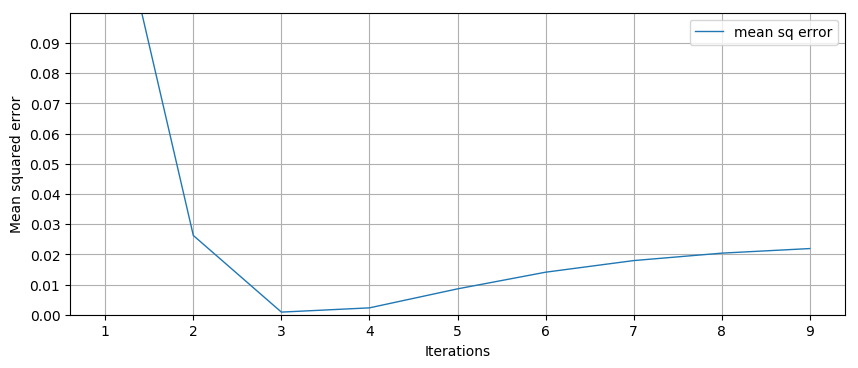

In [17]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(np.arange(1,10,step=1),cost_history[1:10],linewidth=1,label="mean sq error")
plt.xticks(np.arange(1,10,step=1))
plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.ylim(0,0.1)
plt.yticks(np.arange(0,0.1,step=0.01))
plt.legend()
plt.grid()

# Inference :

    we see on the 4th iteration(as interation starts from 0) the error is minimum, and increases again 
    when iterations are increased.
    Hence we select number of iterations = 4

In [18]:
alpha = 0.005
n = np.size(X[1])+1                          # no of features in X + 1 for X0 term which will be added
initial_Theta = np.zeros((1,n),dtype=float)  # initialize theta vector with all 0's
iterations = 4                             # best value of iteration from graph
optimized_theta,cost_history=GradientDescent(x=X_train,y=Y_train,theta=initial_Theta,alpha=alpha,num_iterations=iterations)
print("Optimal value of theta\n")
print(optimized_theta)
print("-------------------------------------")
print("final Mean squared error: %.9f \n" %cost_history[-1])

Optimal value of theta

[[0.05535396]
 [0.71312766]]
-------------------------------------
final Mean squared error: 0.000865875 



# Predicting Y from X in test Set(X_test):

        first checking with a single test case
        Here we will be predicting for the 10th example(row) in the test set

In [19]:
finalX_test = addX0(X_test) # the bias/intercept term from theta0 , X0 needs to be added
finalX_test[0:5]        

array([[ 1.    , 21.279 ],
       [ 1.    ,  5.4069],
       [ 1.    ,  5.3054],
       [ 1.    ,  6.4296],
       [ 1.    ,  5.1884]])

In [20]:
actual_value = Y_test[0]
actual_value

17.929000000000002

# Making Predictions of Y given the value of X:

        pred = X * Theta; where X is (mXn) Matrix and theta is (nX1) column vector
        The result will be a mX1 vector , where m is no of rows in X
        Here :
        X = (1X2) matrix ; a single row from X_test  
        optimized_theta = (2X1) column vector

In [21]:
predicted_value = finalX_test[0] @ optimized_theta
predicted_value[0]

15.229997517006257

# Prediction for entire Test set and ploting it as the best fit line

In [22]:
rows = len(finalX_test)
pred = np.zeros((rows),dtype=float)
pred               
for i in range(rows):
    pred[i] = finalX_test[i] @ optimized_theta

Text(0.5,1,'Linear Regression without feature scaling')

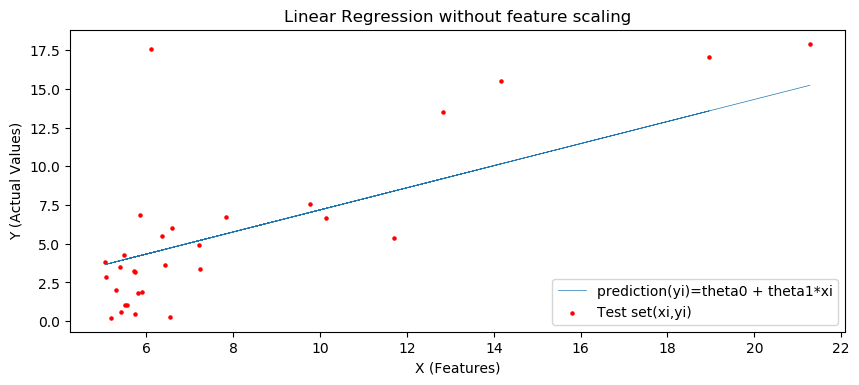

In [23]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

Testsetplt=plt.scatter(X_test,Y_test,color='r',s=5, label = 'Test set(xi,yi)')
bestfitline=plt.plot(X_test,pred,linewidth = 0.5,label = 'prediction(yi)=theta0 + theta1*xi')
plt.xlabel('X (Features)')
plt.ylabel('Y (Actual Values)')
plt.legend()
plt.title("Linear Regression without feature scaling")

# Feature Scaling:

    Linear Regression uses Gradient descent for minimizing the cost function

    Theta = Theta - alpha * [ (1/M) * sum{ (h(xi)-yi) * X(i,j) } ]

    The presence of feature value X in the formula will affect the step size of the gradient descent.
    The difference in ranges of features will cause different step sizes for each feature.
    To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent
    are updated at the same rate for all the features, we scale the data before feeding it to the model.

    we are going to use Feature Standardization

    Standardization is scaling technique where the values are centered around the mean with a unit standard deviation.
    This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
        
        xk' = (xk - mean(x))/std(x) ; where xk is a value of feature x, xk' is the scaled value for xk
                                      mean(x): mean of all values under feature x
                                      std(x): standard deviation of all values under feature x

In [24]:
def calculate_Mean(x):
    return sum(x)/len(x)

# std deviation formula:

    Std div = square root of varience
    varience = calculate the Mean of all numbers
               Then for each number: subtract the Mean and square the Difference
               Then add all the squared differences and divide by total numbers -1(mean of the Squared difference)
               Note :the std_div formula i saw had N-1 hence i am implementing according to formula

In [25]:
def calculate_StdDiv(x):
    mean = calculate_Mean(x)
    sum_sq_diff = 0
    for xi in x:
        diff = xi - mean
        sum_sq_diff += pow(diff,2)
    
    varience = sum_sq_diff/(len(x)-1)
    std_div = math.sqrt(varience)
    
    return std_div

In [26]:
mean = calculate_Mean(X)
mean

8.159800000000002

In [27]:
a = calculate_StdDiv(X)
a

3.8698835278823314

# Function For Scaling The Features

In [28]:
def Standard_Scaler(X):
    
    X_scaled = np.zeros(X.shape,dtype=float)
    no_of_rows = len(X)
    mean = calculate_Mean(X)
    std_div = calculate_StdDiv(X)
    
    for i in range(no_of_rows):
        X_scaled[i] = ( X[i] - mean )/std_div
        
    return X_scaled   

In [29]:
X[0:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [30]:
X_scaled = Standard_Scaler(X)
X_scaled

array([-0.52965418, -0.68014967,  0.09271597, -0.29887204, -0.59433313,
        0.05765031, -0.17659446,  0.10809111, -0.4324678 , -0.80240141,
       -0.63286142,  1.55151956, -0.62684057,  0.06423966, -0.65094982,
       -0.71847124, -0.46368321, -0.78289178, -0.44709356, -0.28140382,
       -0.50924013,  3.12934483, -0.68986572, -0.47383855, -0.67053698,
        2.78695726,  1.20628953,  0.72281245,  1.29621472,  3.62884306,
       -0.75128876, -0.40580033,  0.28124877, -0.58606415,  0.01325621,
       -0.05850305, -0.01651212, -0.65983898,  1.20835678, -0.46678407,
       -0.71136508, -0.33006161,  0.91687514, -0.61658186, -0.08659175,
       -0.27564137, -0.79837028, -0.60942403,  0.91480789, -0.67655783,
       -0.16010818, -0.73699893, -0.19016076, -0.14385446, -0.47210723,
       -0.46536284, -0.48724981, -0.65120823,  0.29726993,  0.33432531,
        0.17199484, -0.77017822,  3.39007619,  1.74377341,  2.79057494,
       -0.24331482,  0.03496229,  0.53650193, -0.68746255,  3.14

# Dividing the scaled features and actual values into training and test sets

In [31]:
X_train_scld,X_test_scld,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.3,random_state = 42)

# Running Gradient descent on scaled features:

        here learning rate is initialized with a higher value (0.005 to 0.02) as X is now scaled 
        thus changes in X will not change the theta value too much hence with alpha = 0.005
        gradient decent would require more iterations 
        alpha can be 0.03 ,0.05, 0.1, 0.5 ,1 in order to reduce the number of iterations required,
        however with higher alpha value gradient descent may diverge quickly 
        (one can initialize alpha with different value and select the one which suitd the model best)

In [32]:
alpha = 0.02
n = np.size(X[1])+1                          # no of features in X + 1 for X0 term which will be added
initial_Theta = np.zeros((1,n),dtype=float)  # initialize theta vector with all 0's
iterations = 100
theta,cost_history=GradientDescent(x=X_train_scld,y=Y_train,theta=initial_Theta,alpha=alpha,num_iterations=iterations)
print("Theta value we got after 100 iteration\n")
print(theta)
print("-------------------------------------")
print("change in cost with iteration\n")
print(cost_history)

Theta value we got after 100 iteration

[[5.05349076]
 [4.26621497]]
-------------------------------------
change in cost with iteration

[6.11901761e-01 5.78491433e-01 5.46663657e-01 5.16350283e-01
 4.87485983e-01 4.60008133e-01 4.33856703e-01 4.08974156e-01
 3.85305342e-01 3.62797401e-01 3.41399673e-01 3.21063606e-01
 3.01742672e-01 2.83392280e-01 2.65969704e-01 2.49434002e-01
 2.33745942e-01 2.18867937e-01 2.04763976e-01 1.91399556e-01
 1.78741627e-01 1.66758525e-01 1.55419922e-01 1.44696767e-01
 1.34561236e-01 1.24986680e-01 1.15947577e-01 1.07419488e-01
 9.93790090e-02 9.18037317e-02 8.46722003e-02 7.79638735e-02
 7.16590863e-02 6.57390140e-02 6.01856378e-02 5.49817113e-02
 5.01107287e-02 4.55568940e-02 4.13050920e-02 3.73408598e-02
 3.36503600e-02 3.02203547e-02 2.70381805e-02 2.40917249e-02
 2.13694033e-02 1.88601367e-02 1.65533313e-02 1.44388579e-02
 1.25070323e-02 1.07485973e-02 9.15470438e-03 7.71689670e-03
 6.42709287e-03 5.27757104e-03 4.26095388e-03 3.37019407e-03
 2.59856

# Find the optimal num of iterations required for Convergence:

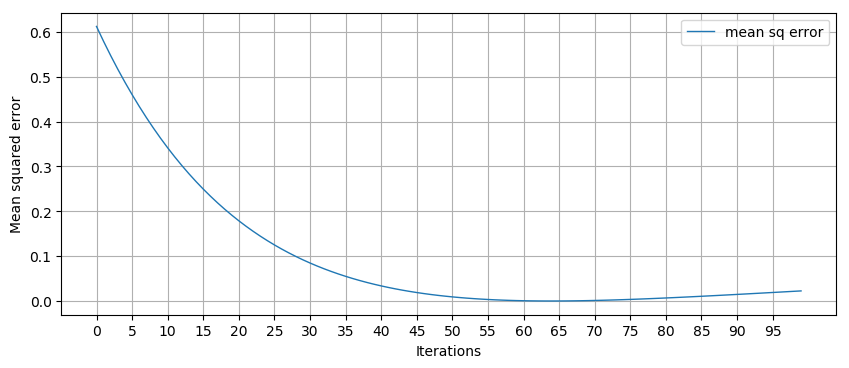

In [33]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(np.arange(0,iterations,step=1),cost_history,linewidth=1,label="mean sq error")
plt.xticks(np.arange(0,iterations,step=5))
plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid()

# Trying to visualize the covergence point better

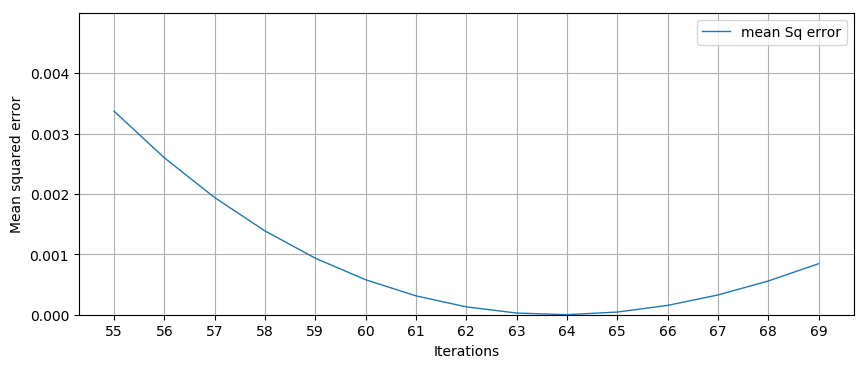

In [34]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(np.arange(55,70,step=1),cost_history[55:70],linewidth=1,label="mean Sq error")
plt.xticks(np.arange(55,70,step=1))
plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.ylim(0,0.005)
plt.yticks(np.arange(0,0.005,step=0.001))
plt.legend()
plt.grid()

# Inference :

    we see after on 65th iteration(as interation starts from 0) the error is minimum, and increases again 
    when iterations are increased.
    Hence we select number of iterations = 65

In [35]:
alpha = 0.02
n = np.size(X[1])+1                          # no of features in X + 1 for X0 term which will be added
initial_Theta = np.zeros((1,n),dtype=float)  # initialize theta vector with all 0's
iterations = 65                              # best value of iteration from graph
optimized_theta,cost_history=GradientDescent(x=X_train_scld,y=Y_train,theta=initial_Theta,alpha=alpha,num_iterations=iterations)
print("Optimal value of theta\n")
print(optimized_theta)
print("-------------------------------------")
print("final Mean squared error: %.9f \n" %cost_history[-1])


Optimal value of theta

[[4.28119483]
 [3.58643217]]
-------------------------------------
final Mean squared error: 0.000000563 



# Predicting Y from X in test Set(X_test):

        first checking with a single test case
        Here we will be predicting for the 10th example(row) in the test set

In [36]:
finalX_test_scaled = addX0(X_test_scld) # the bias/intercept term from theta0 , X0 needs to be added
finalX_test_scaled[0:5] 

array([[ 1.        ,  3.39007619],
       [ 1.        , -0.71136508],
       [ 1.        , -0.73759326],
       [ 1.        , -0.44709356],
       [ 1.        , -0.76782673]])

In [37]:
actual_value = Y_test[0]
actual_value

17.929000000000002

# Making Prediction of Y given the value of X:

        pred = X * Theta; where X is (mXn) Matrix and theta is (nX1) column vector
        The result will be a mX1 vector , where m is no of rows in X
        Here :
        X = (1X2) matrix ; a single row from X_test  
        optimized_theta = (2X1) column vector

In [38]:
predicted_value = finalX_test_scaled[0] @ optimized_theta
predicted_value[0]

16.439473124090856

# Prediction for entire Test set and ploting it as the best fit line

In [39]:
rows = len(finalX_test_scaled)
pred = np.zeros((rows),dtype=float)
pred               
for i in range(rows):
    pred[i] = finalX_test_scaled[i] @ optimized_theta

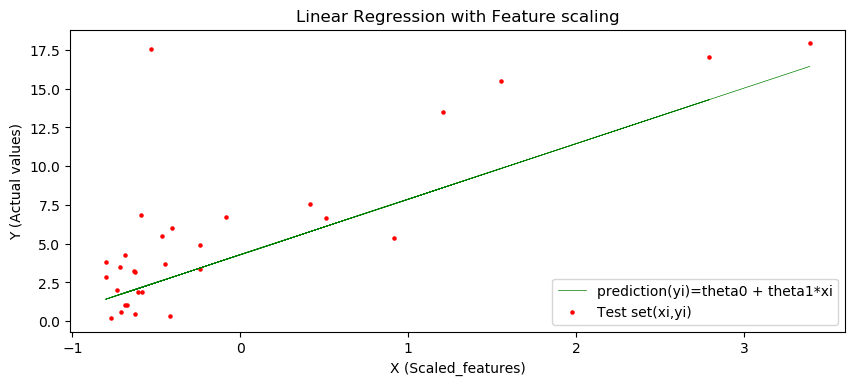

In [40]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.scatter(X_test_scld,Y_test,color='r',s=5,label = 'Test set(xi,yi)')
plt.plot(X_test_scld,pred,'g-',linewidth=0.5,label = 'prediction(yi)=theta0 + theta1*xi')
plt.xlabel("X (Scaled_features)")
plt.ylabel('Y (Actual values)')
plt.title('Linear Regression with Feature scaling')
plt.legend()

# Entension / Future works:

        The above is an example of single variable Linear Regression , so with minor modifications one can change this code 
        to supoort multi variable Linear regression.
        The feature scaling method used here is Stadardization
        one can also use a normalization for feature scaling depending on the data set they use.